<a href="https://colab.research.google.com/github/andrewCoder2024/tensorflow-training/blob/main/MachineLearning_Homework3_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Template for Problem 6

In [ ]:
pip install pandas numpy scipy mlxtend

In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
from mlxtend.plotting import category_scatter
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Question 1

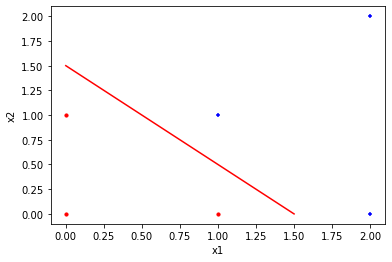

In [ ]:
data = [[1, 1,'+'], [2,2, "+"], [2,0,"+"],[0, 0 ,'-'], [1,0, "-"], [0,1,"-"]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['x1', 'x2','class'])
x1 = np.linspace(0,1.5)
x2 = -1*x1+1.5
plt.plot(x1, x2, '-r', label='lin_sep')
plt.scatter(df.iloc[:3].x1, df.iloc[:3].x2, s=10, c='b', marker="+", label='first')
plt.scatter(df.iloc[3:].x1, df.iloc[3:].x2, s=10, c='r', marker="o", label='second')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

Question 2:
Weight vector [1,1] and max margin hyperplane is is x1 + x2 = 1.5 as the hyperplane is clearly negative, and this line seems to maximize the margin between the support vectors. Support vectors are (1,0), (1,1), (0,1), (2,0) as they are the four closest to the hyperplane. 

Question 3: Margin will only ever increase or stay the same when support vectors are removed. Whether the margin increases or not depends on the support vector removed itself, and whether a better solution can be found.

# Question 4: Since the nearest point to the hyperplane would have $\overline{w} * \overline{x} + b = 1$ And the explicit function for the distance of any point to the hyperplane being $ \frac{|\overline{w} * \overline{x} + b|}{\| w \|} $, nearest point to the hyperplane would have distance to hyperplane of $ \frac{1}{\| w \|} $
 

Question 5: In this problem, $w_0$ and $w$ are from a seperable hyperplane, which already fits the hard margin constraint. When scaled by $\frac{1}{\| w \|*M}$ The decision boundary remains unchanged due to the scale factor being constant. $x*w + b = 0$ and $c*(x*w) + c*(b) = 0$


Question 6: Given $\| w \| \leq \| w^* \| $ -> $\frac{1}{\| w \|} \leq \frac{1}{\| w^* \|}$




Question 7: The graph is clearly linearly inseperable by the hard margin definition as any linear line would make a mistake due to the positive and negative classes being able to construct linear lines which are perpedindicular to each other. There is no possible way to linearly seperate without cutting off at least one member of a class from its other member. 

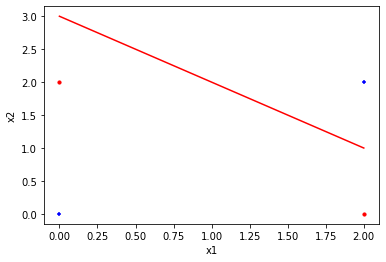

In [ ]:
data = [[0, 0,'+'], [2,2, "+"], [0,2,"-"],[2, 0 ,'-']]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['x1', 'x2','class'])
x1 = np.linspace(0,2)
x2 = -(x1-1) + 2
plt.plot(x1, x2, '-r', label='lin_sep')
plt.scatter(df.iloc[:2].x1, df.iloc[:2].x2, s=10, c='b', marker="+", label='first')
plt.scatter(df.iloc[2:].x1, df.iloc[2:].x2, s=10, c='r', marker="o", label='second')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

Question 8: 
The Line above is a solution to the soft margin svm problem. $W = [3, 1,1]^T$ 
$ϵ_1 = 4, ϵ_2 = 0, ϵ_3 = 0, ϵ_4 = 0$. This solution maximizes the margin, keeps constraints and keeps $ϵ^i = 0$ when $i\neq1$, keeping with the optimization, which sets out to minimize $C\sum_{i=1}^{4}ϵ_i$

Question 9: The function is shown to be a kernel if  $K(x,z) = Φ(x)⋅Φ(z)$ and the function is positive-definite. Given a language L with z number of words, x and z are vectors  with z elements representing documents, where $element_i$ = 1 if the ith word in L is in the document. Thus $Φ(x)⋅Φ(z)$ is the intersection of x and z, and is positive-definite, getting bigger (i.e. = 1) if the $x_i$ similar to $z_i$, otherwise = 0. 

Question 10: feature map: $K(x,z) = (1+βxz)^2-1 = 2βxz + β^2x^2z^2 = [(\sqrt{2β}x_1,βx_1),(\sqrt{2β}x_2,βx_2)]⋅[(\sqrt{2β}z_1,βz_1),(\sqrt{2β}z_2,βz_2)]^T = Φ(x)⋅Φ(z)$ 

### Question 11

In [ ]:
# Read the data
mnist_train = np.genfromtxt('mnist_train.txt', delimiter=',')
mnist_test = np.genfromtxt('mnist_test.txt', delimiter=',')
print(mnist_train.shape, mnist_test.shape)

(2000, 785) (1000, 785)


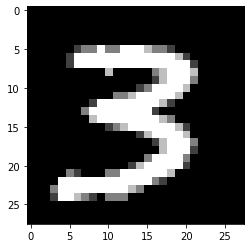

Label: 3


In [ ]:
# Plot one image to check it worked
img = mnist_train[0, 1:].astype(sp.uint8).reshape(28, 28)
plt.gray()
plt.imshow(img)
plt.show()
print('Label:', mnist_train[0, 0].astype(sp.uint8))

In [ ]:
# Function to normalize the features of a data set
def normalize(dataset : np.ndarray) -> np.ndarray:
    normalized_dataset = dataset.copy()
    # normalize the features (but not the labels)
    # TODO: add your code here
    normalized_dataset[:, 1:] =  normalized_dataset[:, 1:] * (2/255)-1
    return normalized_dataset

# Apply the function on each data set
normalized_mnist_train = normalize(mnist_train)
normalized_mnist_test = normalize(mnist_test)

# Check: after normalization, the values should be between -1 and 1 
print("First training data point normalization:\n", mnist_train[0])
print("\nFirst training data point after normalization:\n", normalized_mnist_train[0])



First training data point normalization:
 [  3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  64. 128. 128. 255. 128. 128. 255.
 255. 255. 191. 128. 128.  64.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  64. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 191.

### Question 12

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC()

# Learn the digits on the train subset
X_train, y_train = normalized_mnist_train[:, 1:], normalized_mnist_train[:, 0]
# TODO: fit the model by calling the 'clf.fit' function
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
X_test, y_test = normalized_mnist_test[:, 1:], normalized_mnist_test[:, 0]
predicted_test = clf.predict(X_test)# TODO: get predictions using the 'predict' function of clf
print(predicted_test)

[4. 2. 2. 3. 8. 2. 9. 9. 2. 2. 4. 2. 9. 3. 9. 0. 6. 1. 9. 2. 6. 5. 5. 3.
 7. 7. 7. 0. 0. 2. 8. 4. 1. 9. 7. 0. 5. 0. 7. 0. 4. 4. 1. 6. 5. 9. 0. 3.
 7. 9. 3. 7. 8. 6. 9. 5. 9. 8. 4. 8. 5. 1. 6. 0. 9. 7. 3. 9. 5. 9. 5. 9.
 4. 0. 9. 6. 8. 1. 7. 8. 3. 5. 4. 4. 3. 3. 6. 3. 0. 6. 3. 7. 3. 5. 7. 1.
 9. 1. 2. 7. 0. 5. 6. 4. 1. 3. 0. 4. 0. 5. 1. 2. 2. 8. 5. 8. 1. 7. 6. 8.
 4. 8. 4. 6. 1. 1. 7. 6. 2. 5. 2. 0. 2. 2. 8. 1. 4. 6. 5. 2. 4. 4. 1. 7.
 6. 4. 2. 1. 7. 6. 6. 5. 8. 7. 6. 7. 7. 1. 1. 5. 9. 9. 6. 2. 1. 5. 7. 6.
 5. 3. 8. 6. 2. 2. 0. 0. 0. 2. 6. 4. 8. 3. 9. 6. 9. 4. 3. 4. 5. 9. 7. 2.
 3. 6. 4. 8. 4. 4. 4. 2. 2. 7. 0. 8. 7. 2. 5. 8. 2. 8. 9. 7. 3. 7. 8. 6.
 0. 9. 7. 7. 2. 0. 4. 5. 2. 5. 5. 3. 2. 7. 3. 1. 6. 0. 1. 6. 7. 7. 0. 9.
 5. 7. 1. 7. 0. 1. 9. 1. 1. 9. 1. 5. 6. 7. 7. 7. 2. 9. 0. 1. 6. 7. 0. 8.
 4. 7. 8. 9. 8. 1. 1. 2. 5. 1. 6. 3. 1. 3. 1. 1. 3. 0. 1. 5. 2. 2. 7. 6.
 8. 1. 1. 6. 8. 9. 3. 1. 9. 1. 5. 5. 9. 9. 6. 5. 6. 7. 4. 1. 4. 4. 9. 5.
 4. 4. 4. 8. 2. 6. 3. 2. 7. 3. 2. 9. 2. 7. 7. 4. 0.

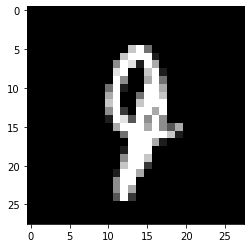

Label: 9
Predicted: 4


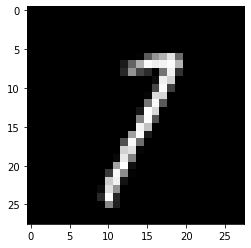

Label: 7
Predicted: 1


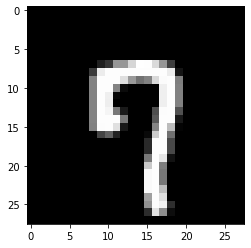

Label: 7
Predicted: 9


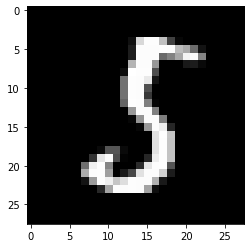

Label: 5
Predicted: 3


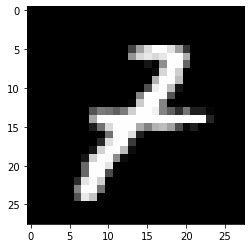

Label: 7
Predicted: 1


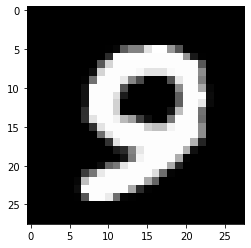

Label: 9
Predicted: 8


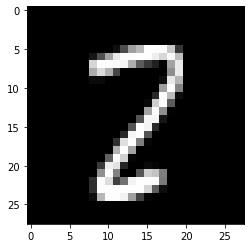

Label: 2
Predicted: 8


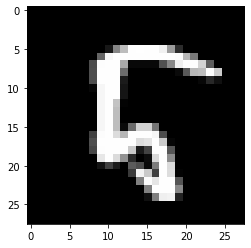

Label: 5
Predicted: 8


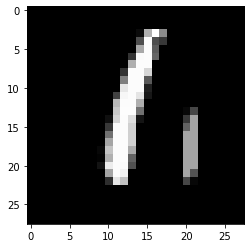

Label: 1
Predicted: 6


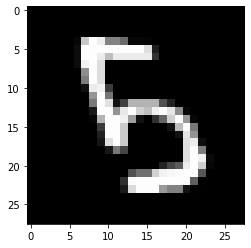

Label: 5
Predicted: 3


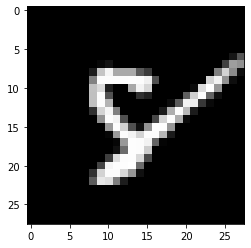

Label: 8
Predicted: 4


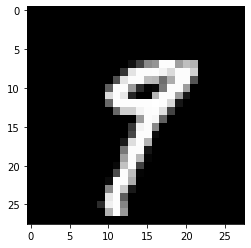

Label: 9
Predicted: 7


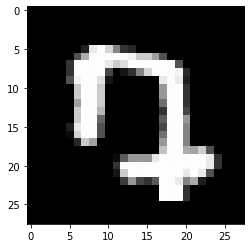

Label: 7
Predicted: 0


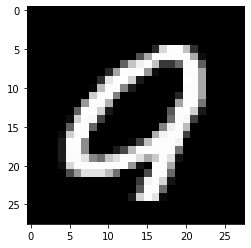

Label: 9
Predicted: 0


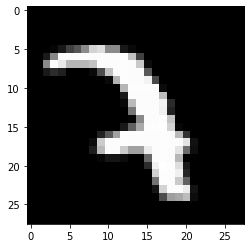

Label: 7
Predicted: 1


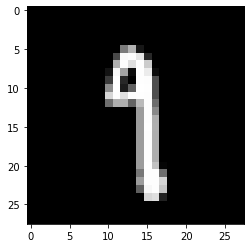

Label: 9
Predicted: 1


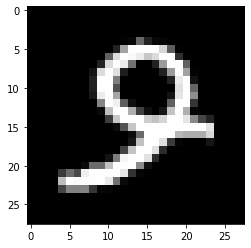

Label: 9
Predicted: 8


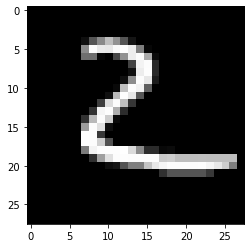

Label: 2
Predicted: 6


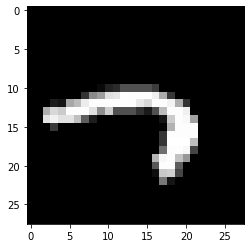

Label: 7
Predicted: 5


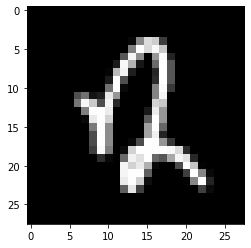

Label: 2
Predicted: 4


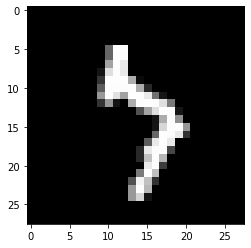

Label: 7
Predicted: 5


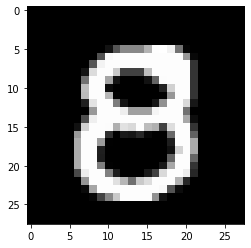

Label: 8
Predicted: 3


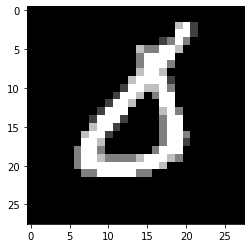

Label: 0
Predicted: 6


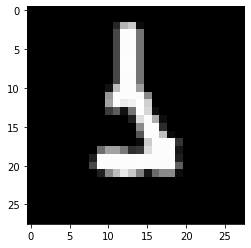

Label: 1
Predicted: 6


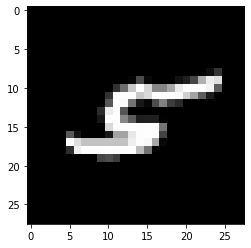

Label: 5
Predicted: 4


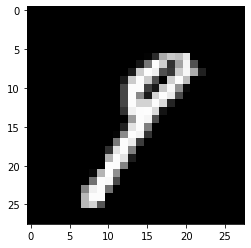

Label: 9
Predicted: 1


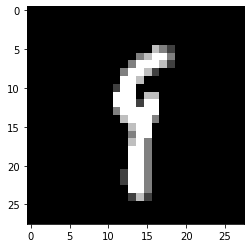

Label: 9
Predicted: 1


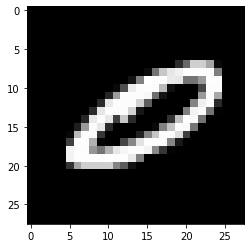

Label: 0
Predicted: 5


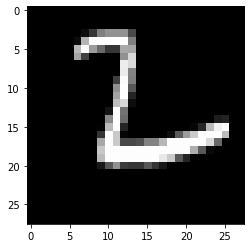

Label: 2
Predicted: 6


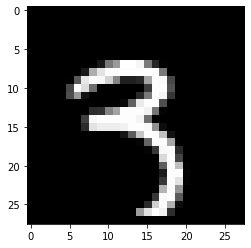

Label: 3
Predicted: 9


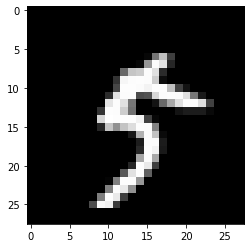

Label: 5
Predicted: 9


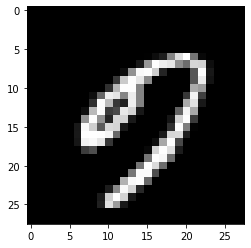

Label: 9
Predicted: 0


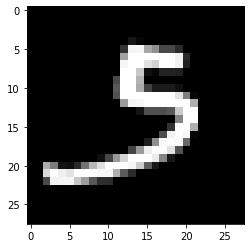

Label: 5
Predicted: 3


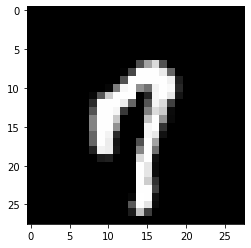

Label: 7
Predicted: 9


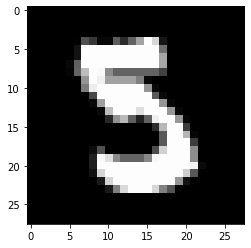

Label: 5
Predicted: 3


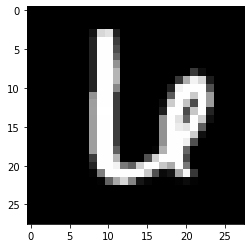

Label: 6
Predicted: 0


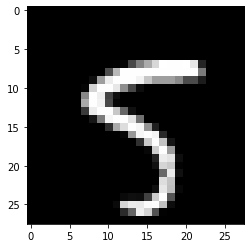

Label: 5
Predicted: 9


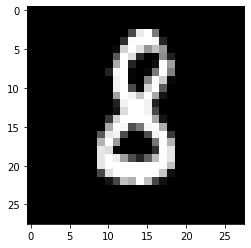

Label: 8
Predicted: 6


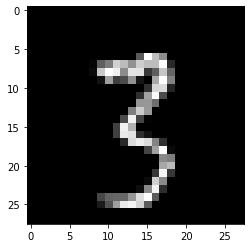

Label: 3
Predicted: 7


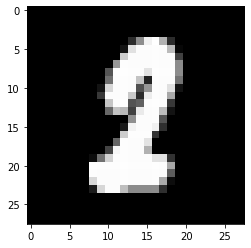

Label: 2
Predicted: 8


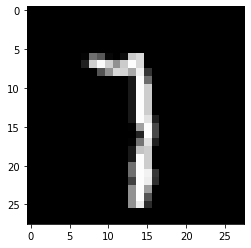

Label: 7
Predicted: 1


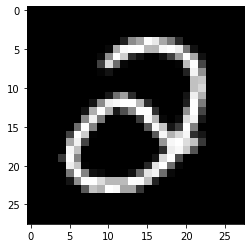

Label: 2
Predicted: 5


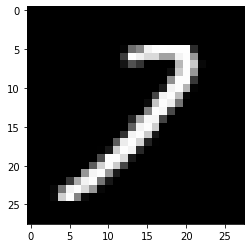

Label: 7
Predicted: 1


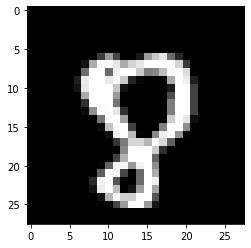

Label: 8
Predicted: 7


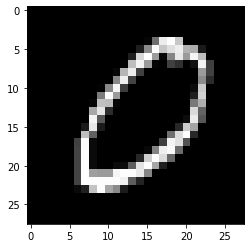

Label: 0
Predicted: 5


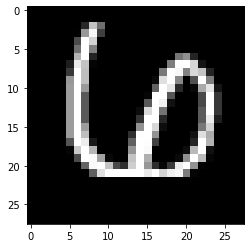

Label: 6
Predicted: 2


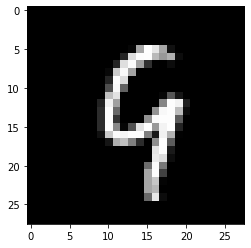

Label: 9
Predicted: 4


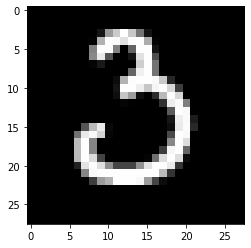

Label: 3
Predicted: 0


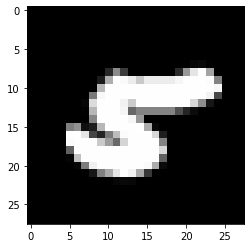

Label: 5
Predicted: 8


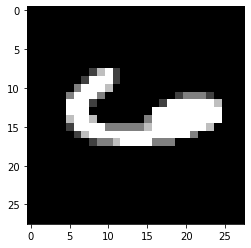

Label: 6
Predicted: 4


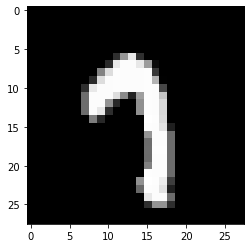

Label: 7
Predicted: 9


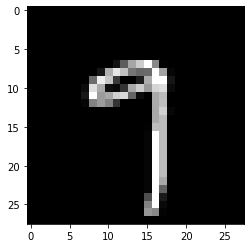

Label: 9
Predicted: 7


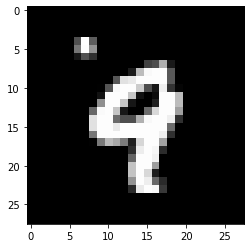

Label: 9
Predicted: 4


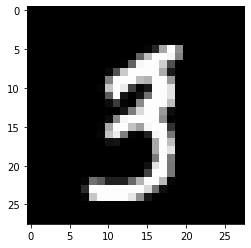

Label: 3
Predicted: 9


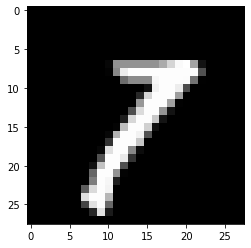

Label: 7
Predicted: 1


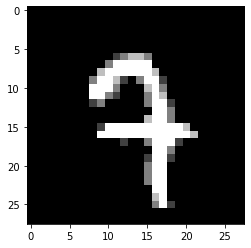

Label: 7
Predicted: 9


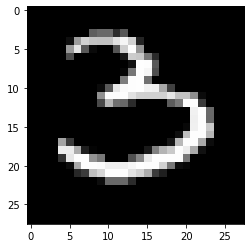

Label: 3
Predicted: 5


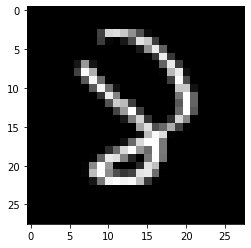

Label: 8
Predicted: 2


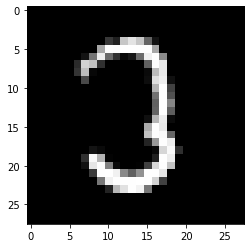

Label: 3
Predicted: 2


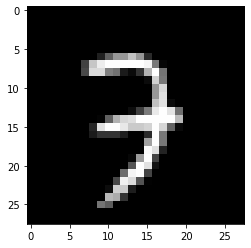

Label: 7
Predicted: 9
Number of errors:  60
test error = 6.0%


In [ ]:
# Inspect elements of the test data set for which predictions are not correct
cpt_errors = 0
for i in range(mnist_test.shape[0]):
  true_label = y_test[i].astype(sp.uint8)
  predicted_label = predicted_test[i].astype(sp.uint8)
  if true_label != predicted_label:
    img = mnist_test[i,1:].astype(sp.uint8).reshape(28, 28)
    plt.gray()
    plt.imshow(img)
    plt.show()
    print('Label:', y_test[i].astype(sp.uint8))
    print('Predicted:', predicted_test[i].astype(sp.uint8))
    cpt_errors += 1
print('Number of errors: ', cpt_errors)
print("test error = " +str(cpt_errors/10) +"%")

## Question 13

In [ ]:
# Use 5-fold cross-validation with default parameters
print(sum(cross_val_score(clf, X_train, y_train, cv=5)))

4.7


In [ ]:
# Try with different parameters
# TODO: Replace below by other values
C2 = 10.0
gamma2 = 'scale' # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C2, gamma=gamma2)
clf.fit(X_train, y_train)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.9325 0.9325 0.9425 0.9525 0.94  ]


In [ ]:
import math

In [ ]:
# TODO: Try with a few more values for C and gamma
min_score = -math.inf
score = 0
min_c, min_gamma = 0,0
for gamma in range(-3,3,1):
  for c in range(-3,3,1):
    
    g = 10**gamma
    C = 10**c
    clf = svm.SVC(C=C, gamma=g)
    val_score = cross_val_score(clf, X_train, y_train, cv=5)
    print(val_score)
    if sum(val_score) > min_score:
      print("success")
      min_c, min_gamma, score, min_score = C, g,val_score, sum(val_score)


[0.7625 0.755  0.7325 0.735  0.7525]
success
[0.7625 0.755  0.7325 0.735  0.7525]
[0.8225 0.8125 0.785  0.8175 0.825 ]
success
[0.91   0.92   0.9125 0.9175 0.92  ]
success
[0.9225 0.915  0.93   0.9325 0.9175]
success
[0.9175 0.915  0.935  0.93   0.915 ]
[0.7775 0.7575 0.79   0.76   0.7525]
[0.7775 0.7575 0.79   0.76   0.7525]
[0.8    0.7775 0.8    0.7775 0.7675]
[0.9375 0.9325 0.9425 0.94   0.94  ]
success
[0.94   0.935  0.94   0.9425 0.94  ]
success
[0.94   0.935  0.94   0.9425 0.94  ]
[0.1275 0.1275 0.14   0.1475 0.115 ]
[0.1275 0.1275 0.14   0.1475 0.115 ]
[0.1275 0.1275 0.14   0.1475 0.115 ]
[0.2775 0.2825 0.2975 0.325  0.275 ]
[0.29   0.3    0.31   0.34   0.2975]
[0.29   0.3    0.31   0.34   0.2975]
[0.815  0.725  0.8075 0.73   0.7175]
[0.6575 0.6525 0.6525 0.645  0.5425]
[0.6575 0.6525 0.6525 0.645  0.5425]
[0.1125 0.105  0.1125 0.1275 0.1075]
[0.1125 0.11   0.12   0.135  0.11  ]
[0.1125 0.11   0.12   0.135  0.11  ]
[0.235  0.245  0.2575 0.265  0.2425]
[0.235  0.2475 0.26   0.265

10 0.01 [0.94   0.935  0.94   0.9425 0.94  ] 4.6975


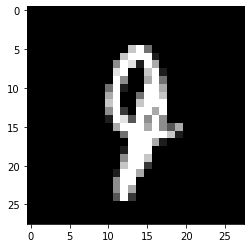

Label: 9
Predicted: 4


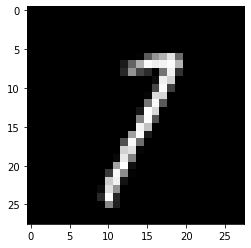

Label: 7
Predicted: 1


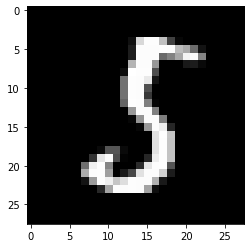

Label: 5
Predicted: 3


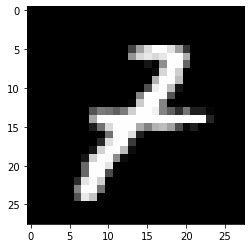

Label: 7
Predicted: 8


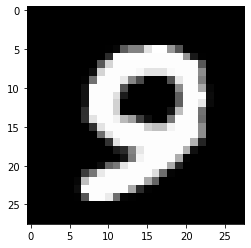

Label: 9
Predicted: 0


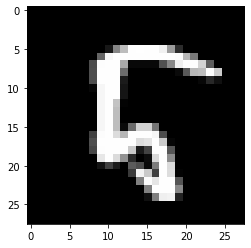

Label: 5
Predicted: 8


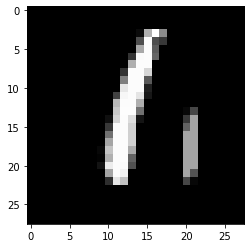

Label: 1
Predicted: 6


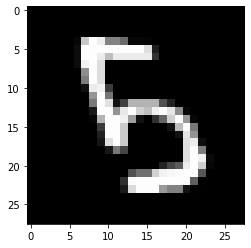

Label: 5
Predicted: 3


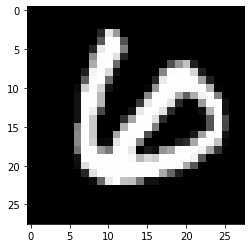

Label: 6
Predicted: 2


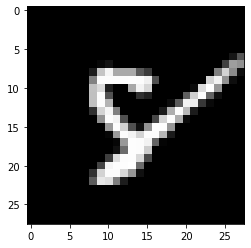

Label: 8
Predicted: 4


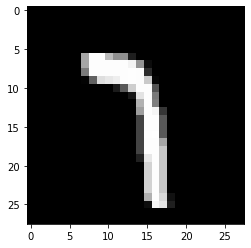

Label: 7
Predicted: 1


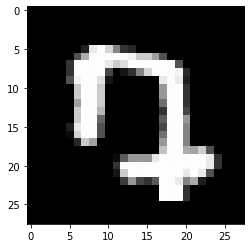

Label: 7
Predicted: 2


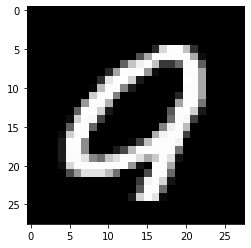

Label: 9
Predicted: 0


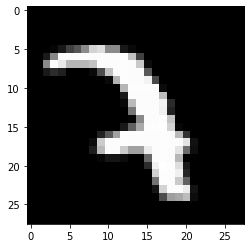

Label: 7
Predicted: 2


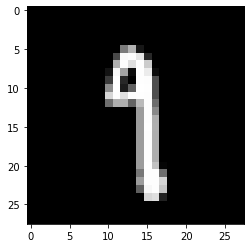

Label: 9
Predicted: 1


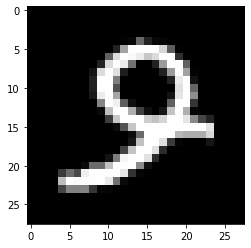

Label: 9
Predicted: 2


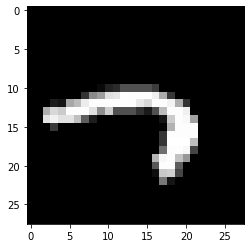

Label: 7
Predicted: 5


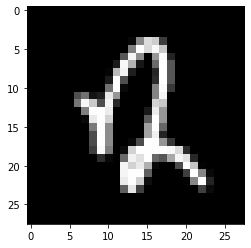

Label: 2
Predicted: 4


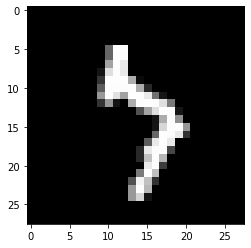

Label: 7
Predicted: 5


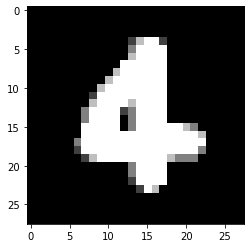

Label: 4
Predicted: 6


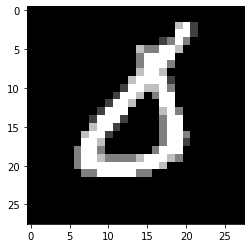

Label: 0
Predicted: 6


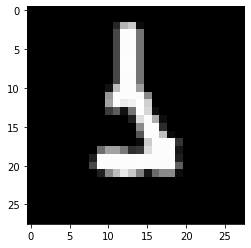

Label: 1
Predicted: 6


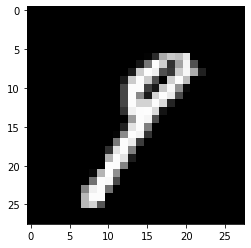

Label: 9
Predicted: 1


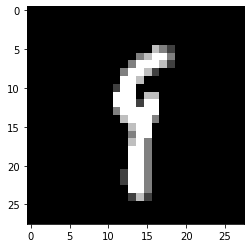

Label: 9
Predicted: 1


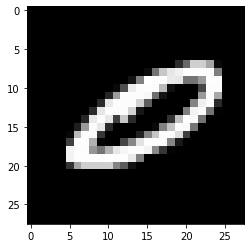

Label: 0
Predicted: 5


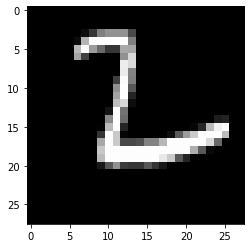

Label: 2
Predicted: 6


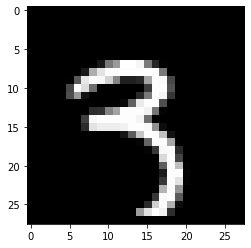

Label: 3
Predicted: 9


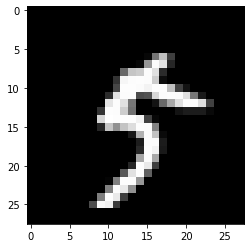

Label: 5
Predicted: 9


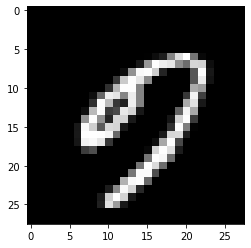

Label: 9
Predicted: 5


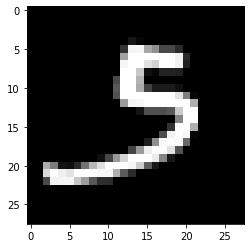

Label: 5
Predicted: 3


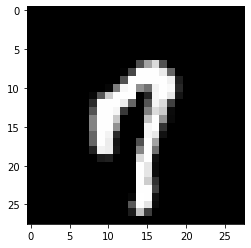

Label: 7
Predicted: 9


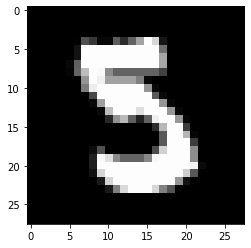

Label: 5
Predicted: 3


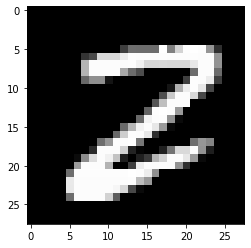

Label: 2
Predicted: 8


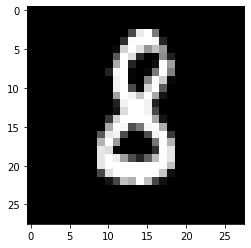

Label: 8
Predicted: 6


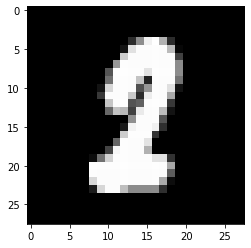

Label: 2
Predicted: 8


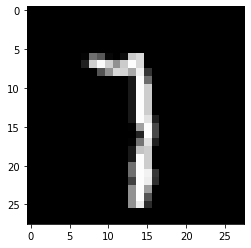

Label: 7
Predicted: 1


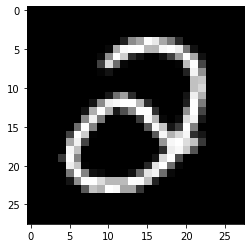

Label: 2
Predicted: 5


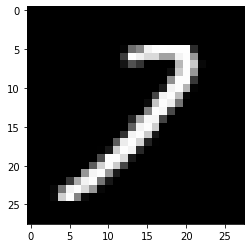

Label: 7
Predicted: 2


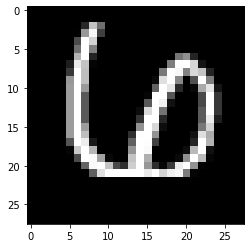

Label: 6
Predicted: 2


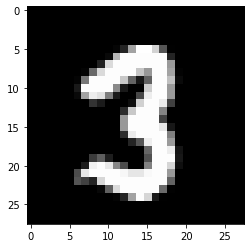

Label: 3
Predicted: 8


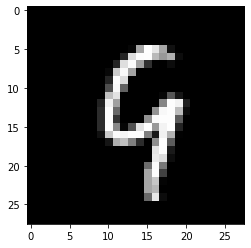

Label: 9
Predicted: 4


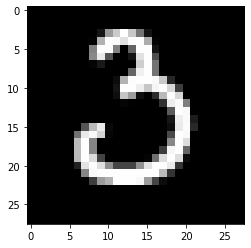

Label: 3
Predicted: 2


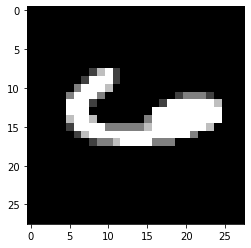

Label: 6
Predicted: 4


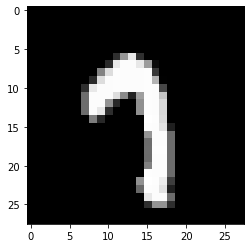

Label: 7
Predicted: 9


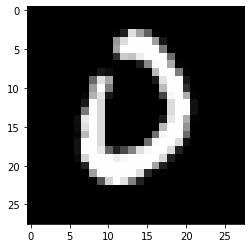

Label: 0
Predicted: 2


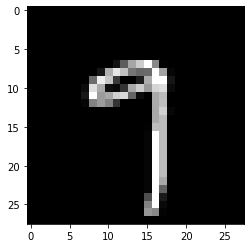

Label: 9
Predicted: 7


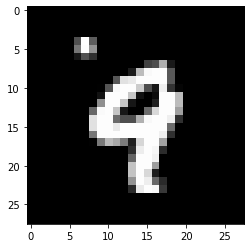

Label: 9
Predicted: 4


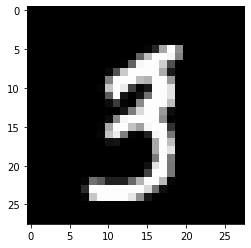

Label: 3
Predicted: 9


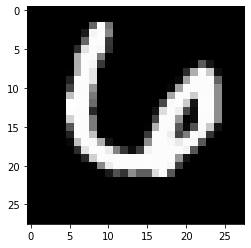

Label: 6
Predicted: 2


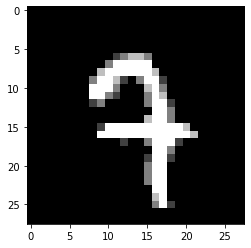

Label: 7
Predicted: 9


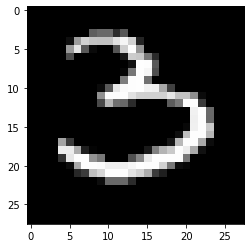

Label: 3
Predicted: 5


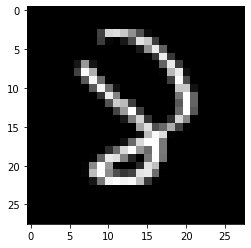

Label: 8
Predicted: 2


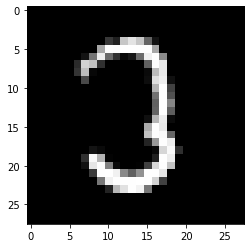

Label: 3
Predicted: 2


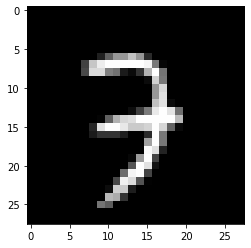

Label: 7
Predicted: 9
Number of errors:  54
test error = 5.4%


In [ ]:
# TODO: compute the testing error for the parameters C and gamma that
# provided the smallest training error
print(min_c, min_gamma, score, min_score)
clf = svm.SVC(C=min_c,gamma=min_gamma)
clf.fit(X_train, y_train)
cpt_errors = 0
predicted_test = clf.predict(X_test)
for i in range(mnist_test.shape[0]):
  true_label = y_test[i].astype(sp.uint8)
  predicted_label = predicted_test[i].astype(sp.uint8)
  if true_label != predicted_label:
    img = mnist_test[i,1:].astype(sp.uint8).reshape(28, 28)
    plt.gray()
    plt.imshow(img)
    plt.show()
    print('Label:', y_test[i].astype(sp.uint8))
    print('Predicted:', predicted_test[i].astype(sp.uint8))
    cpt_errors += 1
print('Number of errors: ', cpt_errors)
print("test error = " +str(cpt_errors/10) +"%")